In [586]:
%matplotlib inline

In [587]:
from matplotlib import pyplot as plt
import numpy as np
import pandas as pd
import pymc3 as pm
from scipy import stats
import seaborn as sns
import statsmodels
from statsmodels import api as sm
import statsmodels.stats.api as sms
import math
import statsmodels.api as smv

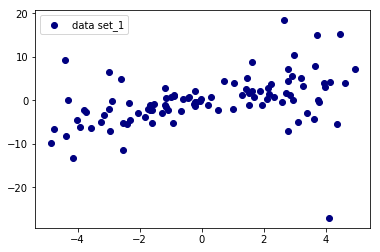

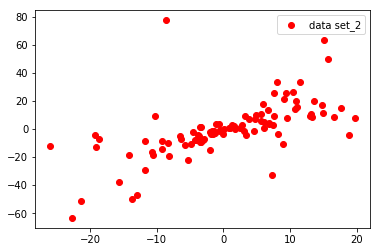

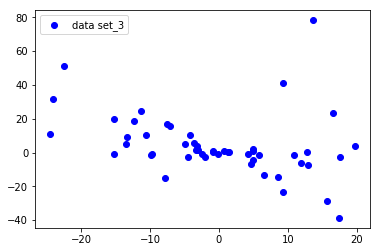

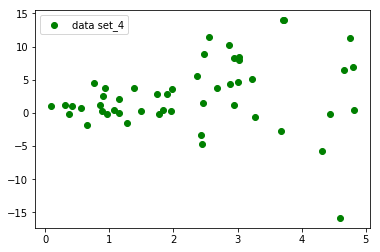

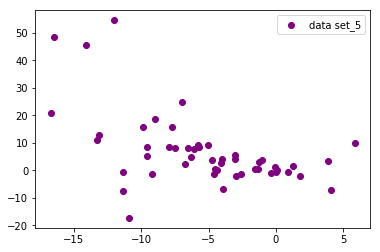

In [611]:
#loading 5 data sets from home-directory
data = {}
resp = {}
for i in range(1,6):
    fname='X_'+str(i)+'.txt'
    fnamey='Y_'+str(i)+'.txt'
    X=np.loadtxt(fname)
    Y=np.loadtxt(fnamey)
    data[i-1] = X
    resp[i-1] = Y

MINN=np.zeros(5)
MAXX=np.zeros(5)
C=['navy', 'red', 'blue', 'green', 'purple','yellow']
for i in range(0,5):
    MINN[i], MAXX[i] = data[i].min() - 1, data[i].max() + 1
    fig, ax = plt.subplots()
    ax.scatter(data[i], resp[i],color=C[i]);
    ax.legend(['data set_'+str(i+1)])
    #label='OLS model (full)'


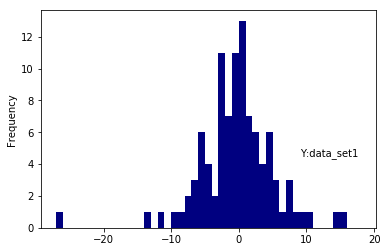

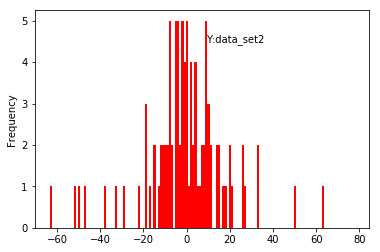

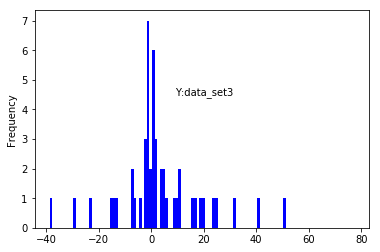

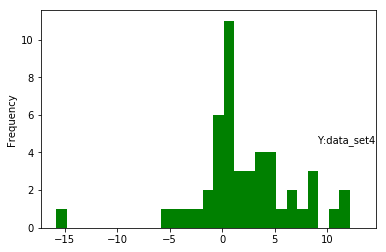

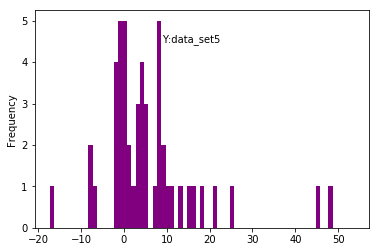

In [637]:
MINNR=np.zeros(5)
MAXXR=np.zeros(5)

#BINN=list(range(-20,20))
for i in range(0,5):
    MINNR[i], MAXXR[i] =resp[i].min(), resp[i].max()
    BINNR= list(np.arange(MINNR[i],MAXXR[i],1))
    fig, ax = plt.subplots()
    pd.Series(resp[i]).plot(kind='hist', bins=BINNR,color=C[i],label="KK")
    plt.text(9, 4.5, 'Y:data_set'+str(i+1))
    
    

In [638]:
dataP={} 
ols_result={}
for i in range(0,5):
    dataP[i]=sm.add_constant(data[i])
    #print(dataP[i])
    ols_result[i] = sm.OLS(resp[i],dataP[i] ).fit()
    print(ols_result[i].summary())
    #print('Parameters: ', ols_result[i].params)
    #print('R2: ', ols_result[i].rsquared)

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.164
Model:                            OLS   Adj. R-squared:                  0.155
Method:                 Least Squares   F-statistic:                     19.22
Date:                Sun, 10 Mar 2019   Prob (F-statistic):           2.93e-05
Time:                        15:27:59   Log-Likelihood:                -308.57
No. Observations:                 100   AIC:                             621.1
Df Residuals:                      98   BIC:                             626.3
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.2695      0.536     -0.503      0.6

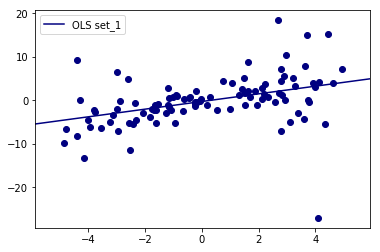

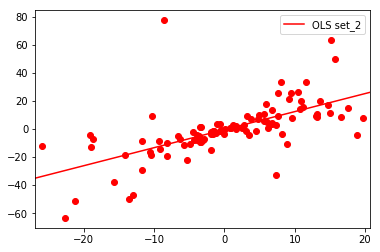

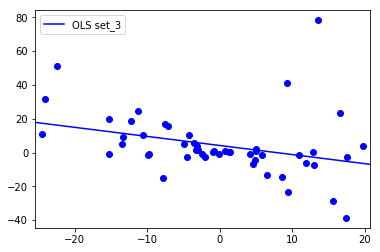

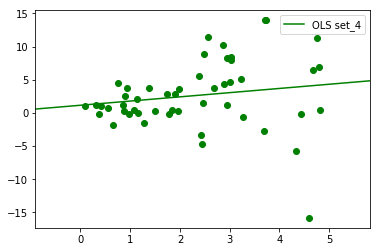

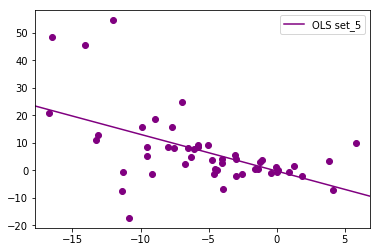

In [645]:
datas={}
Datas={}
for i in range(0,5):
    datas[i]= np.linspace(MINN[i], MAXX[i], 20)
    Datas[i]= sm.add_constant(datas[i])
    fig, ax = plt.subplots()
    ax.scatter(data[i], resp[i],color=C[i]);
    ax.plot(datas[i], ols_result[i].predict(Datas[i]), color=C[i],label='OLS model');
    ax.set_xlim(MINN[i], MAXX[i]);
    ax.legend(loc='upper right');
    ax.legend(['OLS set_'+str(i+1)])

In [682]:
#test for normality
# resi={}
# MINNE=np.zeros(5)
# MAXXE=np.zeros(5)
print("Test For Checking Normality BY Jarque-Bera")
for i in range(0,5):
#     resi[i]=resp[i]-(data[i]* ols_result[i].params[1]+ ols_result[i].params[0])
#     MINNE[i], MAXXE[i] =resi[i].min(), resi[i].max()
#     BINNE= list(np.arange(MINNE[i],MAXXE[i],0.5))
#     fig, ax = plt.subplots()
#     pd.Series(resi[i]).plot(kind='hist', bins=BINNE)
    name = ['Jarque-Bera', 'Chi^2 two-tail prob.', 'Skew', 'Kurtosis']
    test = sms.jarque_bera(ols_result[i].resid)
    print('data_'+str(i+1), test)

   

Test For Checking Normality BY Jarque-Bera
data_1 (472.39980463722924, 2.6283657356926387e-103, -1.324067850511277, 13.313259931850103)
data_2 (522.3149203148531, 3.808519168472229e-114, 1.778461703504943, 13.61620820972488)
data_3 (173.5060597283974, 2.1068704967045583e-38, 2.224833573047068, 10.96764525807978)
data_4 (29.40467998416821, 4.119598301096693e-07, -0.8479323772682648, 6.352355757780116)
data_5 (29.921077427200533, 3.1821495811975905e-07, 0.8301034559594401, 6.40673306478113)


In [649]:
ols_resid={}
resid_fit={}
rho={}
for i in range(0,5):
    ols_resid[i] = ols_result[i].resid
    resid_fit[i] = sm.OLS(ols_resid[i][1:], sm.add_constant(ols_resid[i][:-1])).fit()
    #print(resid_fit[i].tvalues[1])
    #print(resid_fit[i].pvalues[1])
    rho[i] = resid_fit[i].params[1]

    #test for Heteroscedasticity Test
for i in range(0,5):
    print('Heteroscedasticity Test for data_set_'+str(i+1),statsmodels.stats.diagnostic.het_white(ols_resid[i]**2, dataP[i], retres=False))

Heteroscedasticity Test for data_set_1 (4.808483341748426, 0.09033397252489685, 2.449918335811942, 0.0916252027127786)
Heteroscedasticity Test for data_set_2 (0.8001970719581641, 0.6702539986476804, 0.39122616017818734, 0.677289362845173)
Heteroscedasticity Test for data_set_3 (2.601350287860371, 0.2723478569468163, 1.289735723190059, 0.28490835576732)
Heteroscedasticity Test for data_set_4 (6.019181004685592, 0.04931186772081809, 3.216191895498382, 0.04907866478928356)
Heteroscedasticity Test for data_set_5 (7.6502982613980475, 0.021815181975108996, 4.245177693399951, 0.020192415053641378)


In [650]:


### Example for using Huber's T norm with the default
### median absolute deviation scaling
huber_t={}
hub_results={}
for i in range(0,5):
    huber_t [i]= smv.RLM(resp[i], dataP[i], M=smv.robust.norms.HuberT())
    hub_results[i] = huber_t[i].fit()
    print(hub_results[i].weights)

[1.         1.         0.95809534 0.1208995  0.37985807 1.
 0.34575195 1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         0.81340043 0.38560912 1.         1.         1.
 1.         1.         0.86252172 0.8615247  0.33165613 1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         0.99465331
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         0.48650136 1.         1.
 0.75594423 1.         1.         1.         0.50174794 0.95667819
 1.         1.         1.         1.         1.         1.
 1.         0.23650357 0.43773681 1.         1.         0.60163315
 1.         1.         1.         1.         0.8545866  1.
 0.38302105 1.         1.         1.         1.         1.
 1.         1.         1.         1.         0.43798472 1.
 0.47555281 0.26561037 1.         0.94317269 1.         0.49985736
 1.         1.         0

In [532]:
from scipy.linalg import toeplitz
order={}
sigma={}
gls_model={}
gls_results={}

toeplitz(range(5))
for i in range(0,5):
    order[i] = toeplitz(range(len(ols_resid[i])))
    sigma[i] = rho[i]**order[i]
    gls_model[i] = sm.GLS(resp[i],dataP[i], sigma=sigma[i])
    gls_results[i] = gls_model[i].fit()
    print(gls_results[i].summary())
    #print(gls_results[i].params)

                            GLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.185
Model:                            GLS   Adj. R-squared:                  0.176
Method:                 Least Squares   F-statistic:                     22.19
Date:                Sun, 10 Mar 2019   Prob (F-statistic):           8.13e-06
Time:                        00:20:23   Log-Likelihood:                -307.14
No. Observations:                 100   AIC:                             618.3
Df Residuals:                      98   BIC:                             623.5
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.2836      0.454     -0.625      0.5

In [684]:
def mse(actual, predicted):
    return ((actual - predicted)**2).mean()

def RSQ(actual, predicted):
    y_bar=actual.mean()
    re=actual-predicted
    NUMM=sum(np.square(re))
    DOMM=sum(np.square(actual-y_bar))
    RESQ=1-(NUMM/DOMM)
    return(RESQ)

dataP_nout={} 
ols_result_nout={}
data_nout={}
data_nout=data
resp_nout={}
resp_nout=resp
#print (data_nout[0][3])
######outlier
data_nout[0] = data[0][data[0] != 4.0820779]
resp_nout[0] = resp[0][resp[0] != -27.00803487]

data_nout[1] = data[1][data[1] != -8.640359541]
resp_nout[1] = resp[1][resp[1] != 77.64225929]

data_nout[2] = data[2][data[2] != 13.60924464]
resp_nout[2] = resp[2][resp[2] != 78.28113593]



#resp_nout[0].remove(3)
#print(data_nout[0])             
for i in range(0,5):
    dataP_nout[i]=sm.add_constant(data_nout[i])
    ols_result_nout[i] = sm.OLS(resp_nout[i],dataP_nout[i] ).fit()
    print(ols_result_nout[i].summary())
#   print('Parameters: ', ols_result_nout[i].params)
#     print('R2: ', ols_result_nout[i].rsquared)

Y_ols_nout={}
for i in range (0,5):
    Y_ols_nout[i]=data[i]
    Y_ols_nout[i]=Y_ols_nout[i]*ols_result_nout[i].params[1]+ols_result_nout[i].params[0]
    print(ols_result_nout[i])
    print(RSQ(resp[i],Y_ols_nout[i]))


ols_resid_nout={}
resid_fit_nout={}
rho_nout={}
for i in range(0,5):
    ols_resid_nout[i] = ols_result_nout[i].resid
    resid_fit_nout[i] = sm.OLS(ols_resid_nout[i][1:], sm.add_constant(ols_resid_nout[i][:-1])).fit()
#     print(resid_fit_nout[i].tvalues[1])
#     print(resid_fit_nout[i].pvalues[1])
    rho_nout[i] = resid_fit_nout[i].params[1]

from scipy.linalg import toeplitz
order_nout={}
sigma_nout={}
gls_model_nout={}
gls_results_nout={}

toeplitz(range(5))
for i in range(0,5):
    order_nout[i] = toeplitz(range(len(ols_resid_nout[i])))
    sigma_nout[i] = rho_nout[i]**order_nout[i]
    gls_model_nout[i] = sm.GLS(resp_nout[i],dataP_nout[i], sigma=sigma_nout[i])
    gls_results_nout[i] = gls_model_nout[i].fit()
    print(gls_results_nout[i].summary())
    #print(gls_results[i].params)
    
Y_gls_nout={}
for i in range (0,5):
    Y_gls_nout[i]=data[i]
    Y_gls_nout[i]=Y_gls_nout[i]*gls_results_nout[i].params[1]+gls_results_nout[i].params[0]
    print(gls_results_nout[i])
    print(RSQ(resp[i],Y_gls_nout[i]))

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.293
Model:                            OLS   Adj. R-squared:                  0.286
Method:                 Least Squares   F-statistic:                     40.26
Date:                Sun, 10 Mar 2019   Prob (F-statistic):           7.10e-09
Time:                        19:49:14   Log-Likelihood:                -285.50
No. Observations:                  99   AIC:                             575.0
Df Residuals:                      97   BIC:                             580.2
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0129      0.440      0.029      0.9

In [535]:
from scipy.optimize import minimize
import math
def myfunc(params):
    # print(params)  # <-- you'll see that params is a NumPy array
    a, b, s0, s1 = params # <-- for readability you may wish to assign names to the component variables
    X=np.loadtxt('X_5.txt')
    Y=np.loadtxt('Y_5.txt')
    ss=np.ones((50))
    ress=np.zeros((50))
    kapak=np.zeros((50))
    #print (ress)
    for i in range(0,50):
        ss[i]=((X[i]*s1)**2)+(s0**2)
        ress[i]=((Y[i]-b*X[i]-a)**2)/(2*ss[i])
        #print(ss)
        kapak[i]=math.log(ss[i])
       
    NLL= 0.5*np.sum(kapak)+ np.sum(ress)
    return NLL


myresult= minimize(myfunc, [1 ,1 ,1 ,1],method='BFGS')
print(myresult)

      fun: 114.81521007647805
 hess_inv: array([[ 0.12640253,  0.01813645,  0.01810048, -0.00426204],
       [ 0.01813645,  0.04218741, -0.00018548, -0.00023481],
       [ 0.01810048, -0.00018548,  0.10419203, -0.00919975],
       [-0.00426204, -0.00023481, -0.00919975,  0.02230889]])
      jac: array([9.53674316e-07, 5.72204590e-06, 1.90734863e-06, 4.76837158e-06])
  message: 'Optimization terminated successfully.'
     nfev: 114
      nit: 12
     njev: 19
   status: 0
  success: True
        x: array([ 0.23780701, -0.85762322,  0.81847457,  1.34786082])


[0.05307253, 0.97987193]
0.29185398557586284
[-0.43664784, 1.24209258]
0.5243006087349533
[-0.03350694, -0.40562675]
0.19137528869671872
[0.848970404, 0.665350423]
0.025596373566421526
[0.23780701, -0.85762322]
0.21984216965618752


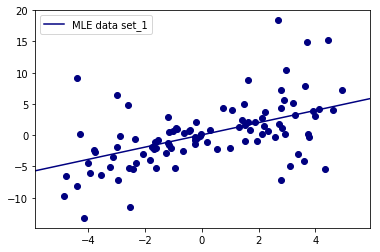

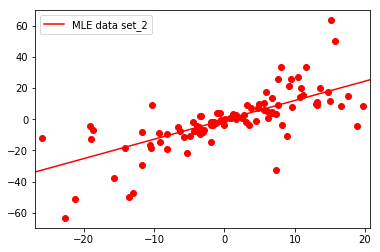

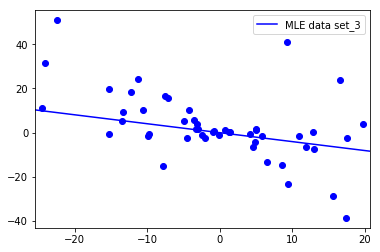

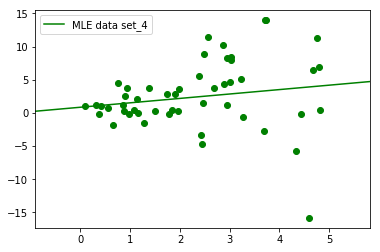

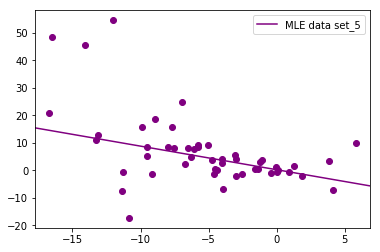

In [654]:

MLE_coef=([0.05307253, 0.97987193], [-0.43664784,  1.24209258], [-0.03350694, -0.40562675], [8.48970404e-01, 6.65350423e-01],[0.23780701, -0.85762322])
#print(MLE_coef[0][0])
Y_MLX={}
for i in range (0,5):
    Y_MLX[i]=data[i]
    Y_MLX[i]=Y_MLX[i]*MLE_coef[i][1]+MLE_coef[i][0]
    print(MLE_coef[i])
    print(RSQ(resp[i],Y_MLX[i]))
    
datas={}
Datas={}
for i in range(0,5):
    datas[i]= np.linspace(MINN[i], MAXX[i], 20)
    Datas[i]= sm.add_constant(datas[i])
    fig, ax = plt.subplots()
    ax.scatter(data[i], resp[i], color=C[i]);
    ax.plot(datas[i], datas[i]*MLE_coef[i][1]+MLE_coef[i][0], color=C[i], label='MLE model');
    ax.set_xlim(MINN[i], MAXX[i]);
    ax.legend(loc='upper right');
    ax.legend(['MLE data set_'+str(i+1)])

# data={}
# DATAX_1= np.zeros((100,5))
# DATAY_1= np.zeros((100,5))
# for i in range(1,5):
#     fname='X_'+str(i)+'.txt'
#     fnamey='Y_'+str(i)+'.txt'
#     X=np.loadtxt(fname)
#     Y=np.loadtxt(fnamey)
#     data=X
#     DATAY[:,i-1]=Y
   
    
# print(DATAX)
# print (DATAY)
# X_2=np.loadtxt(fname = "X_2.txt")
# Y_2=np.loadtxt(fname = "Y_2.txt")
# print(X)
# print (X_2)
# #print(X_1)
# #print(Y_1)
# test = np.array([-2.344913369, -1.278761004, 0.728533634, 4.0820779, -2.98318069])

#print(x)
#y = np.array([-0.553880574, -2.904647572, 4.404359859, -27.00803487, 6.456532235])


Multiprocess sampling (2 chains in 2 jobs)
NUTS: [beta, alpha]
Sampling 2 chains: 100%|████████████████████████████████████████████████████████| 7000/7000 [04:18<00:00, 27.04draws/s]
Multiprocess sampling (2 chains in 2 jobs)
NUTS: [beta, alpha]
Sampling 2 chains: 100%|████████████████████████████████████████████████████████| 7000/7000 [05:03<00:00, 19.46draws/s]
Multiprocess sampling (2 chains in 2 jobs)
NUTS: [beta, alpha]
Sampling 2 chains: 100%|████████████████████████████████████████████████████████| 7000/7000 [02:42<00:00, 42.98draws/s]
Multiprocess sampling (2 chains in 2 jobs)
NUTS: [beta, alpha]
Sampling 2 chains: 100%|████████████████████████████████████████████████████████| 7000/7000 [04:02<00:00, 20.83draws/s]
The number of effective samples is smaller than 25% for some parameters.
Multiprocess sampling (2 chains in 2 jobs)
NUTS: [beta, alpha]
Sampling 2 chains: 100%|████████████████████████████████████████████████████████| 7000/7000 [03:30<00:00, 33.24draws/s]
The acceptan

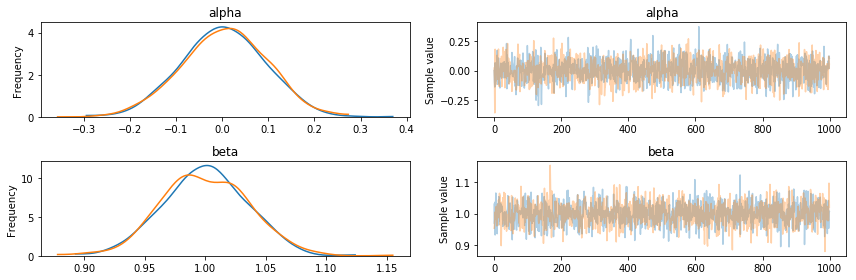

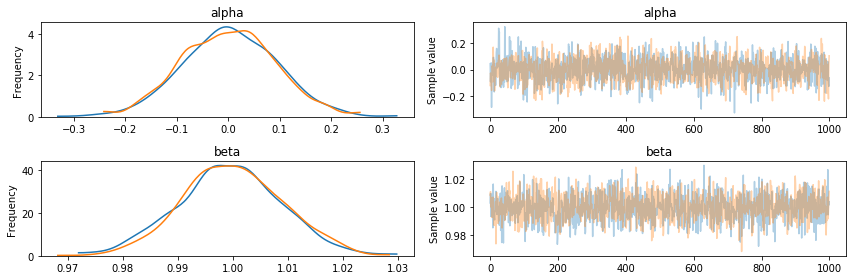

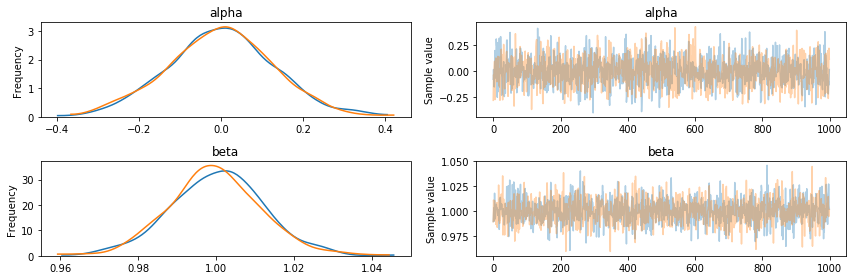

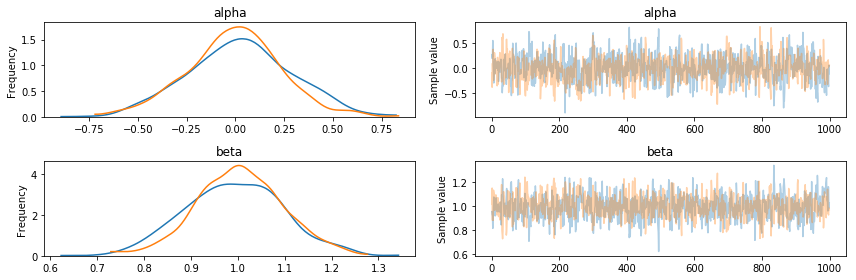

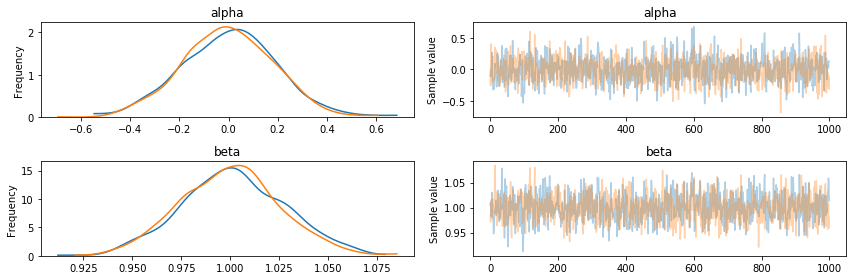

In [583]:
basic_model={}
y_hat={}
y_obser={}
step={}
trace={}
trace_={}
for i in range(0,5):
    basic_model[i]= pm.Model()
    # Regression coefficients
    with basic_model[i]:
        alpha = pm.Uniform('alpha', -100, 100)
        beta = pm.Uniform('beta', -100, 100)
    
    # Expected value
        y_hat[i] =  data[i]* beta+ alpha 
    # Observations with t-distributed error
        y_obser[i] = pm.StudentT('y_obs[i]', nu=5, mu=y_hat[i], observed=data[i])
        step[i] = pm.NUTS()
        trace_[i] = pm.sample(3000, step[i])
        burn = 1000
        thin = 2
        trace[i] = trace_[i][burn::thin]
        pm.plots.traceplot(trace[i]);

0.9995746437044053 0.0021912125239924407
0.29253765006784527
0.9995633752811266 0.0008699433985637484
0.48812144553720116
0.9997924593465253 -0.001674070163548052
-1.3185370841924513
0.9969602606645036 0.006377261602647564
0.014900272429686057
1.0004408106287255 -0.0014044474578802167
-1.4590545213720927


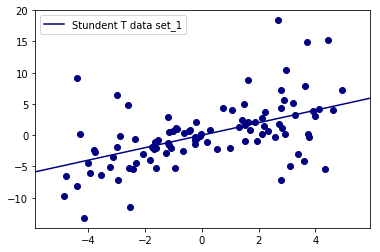

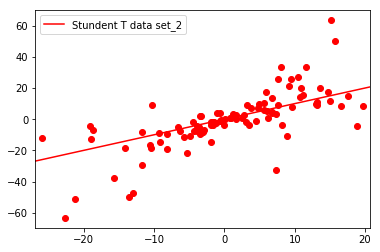

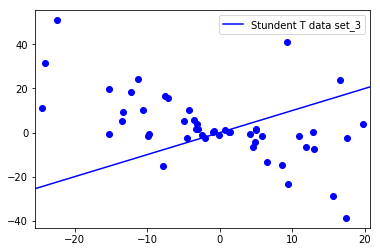

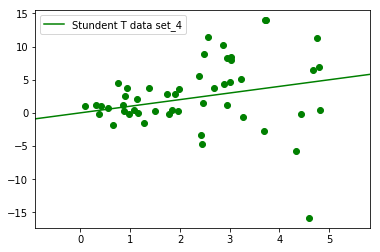

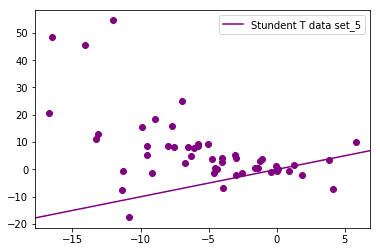

In [657]:
alpha={}
beta={}
for i in range (0,5):
    alpha[i] = trace[i]['alpha'].mean()
    beta[i] = trace[i]['beta'].mean()
    
Y_Rob={}
for i in range (0,5):
    Y_Rob[i]=data[i]
    Y_Rob[i]=Y_Rob[i]*beta[i]+alpha[i]
    print(beta[i],alpha[i])
    print(RSQ(resp[i],Y_Rob[i]))
    
datas={}
Datas={}
for i in range(0,5):
    datas[i]= np.linspace(MINN[i], MAXX[i], 20)
    Datas[i]= sm.add_constant(datas[i])
    fig, ax = plt.subplots()
    ax.scatter(data[i], resp[i],color=C[i]);
    ax.plot(datas[i], datas[i]*beta[i]+alpha[i], color=C[i], label='Robust T-dist model');
    ax.set_xlim(MINN[i], MAXX[i]);
    ax.legend(loc='upper right');
    ax.legend(['Stundent T data set_'+str(i+1)])



In [660]:
modell=pm.Model()
with modell: # model specifications in PyMC3 are wrapped in a with-statement
    # Define priors
    sigma = pm.distributions.continuous.HalfCauchy('sigma', beta=10, testval=1.)
    intercept = pm.distributions.continuous.Normal('Intercept', 0, sd=20)
    x_coeff = pm.distributions.continuous.Normal('data[4]', 0, sd=20)

    # Define likelihood
    likelihood = pm.distributions.continuous.Normal('resp[4]', mu=intercept + x_coeff * data[4],
                        sd=sigma, observed=resp[4])

    # Inference!
    trace = pm.sample(3000, cores=2) # draw 3000 posterior samples using NUTS sampling


Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (2 chains in 2 jobs)
NUTS: [data[4], Intercept, sigma]
Sampling 2 chains: 100%|████████████████████████████████████████████████████████| 7000/7000 [04:28<00:00, 11.96draws/s]
The acceptance probability does not match the target. It is 0.8899848217171634, but should be close to 0.8. Try to increase the number of tuning steps.


<Figure size 504x504 with 0 Axes>

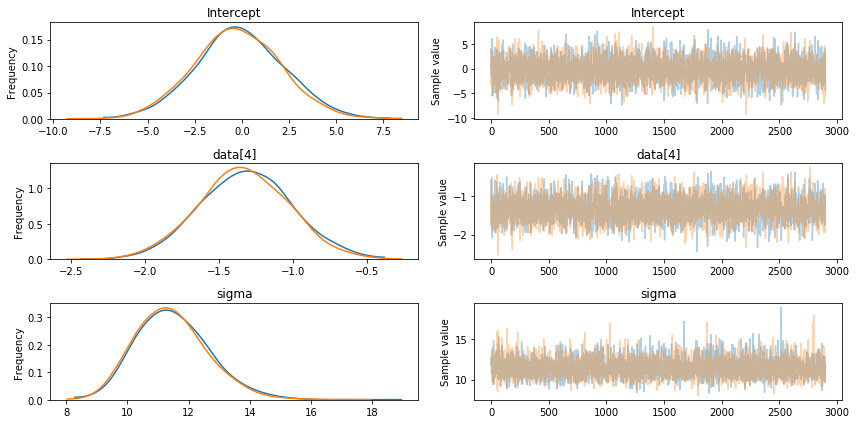

In [661]:
plt.figure(figsize=(7, 7))
pm.traceplot(trace[100:])
plt.tight_layout();
# with modell:
#     # specify glm and pass in data. The resulting linear model, its likelihood and
#     # and all its parameters are automatically added to our model.
#     glm.GLM.from_formula('y ~ x', data[4])
#     trace = pm.sample(3000, cores=2)

-0.17811809116886676 -1.3251123441074721
0.28056334381975767


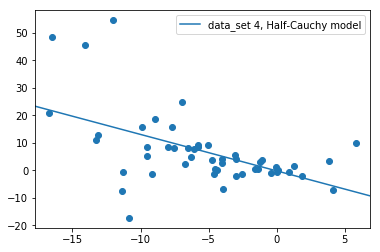

In [662]:
alpha = trace['Intercept'].mean()
beta = trace['data[4]'].mean()
Y_Rob=data[4]
Y_Rob=Y_Rob*beta+alpha
print(alpha,beta)
print(RSQ(resp[4],Y_Rob))
datas= np.linspace(MINN[4], MAXX[4], 20)
Datas= sm.add_constant(datas)
fig, ax = plt.subplots()
ax.scatter(data[4], resp[4]);
ax.plot(datas, datas*beta+alpha, label='data_set 4, Half-Cauchy model');
ax.set_xlim(MINN[4], MAXX[4]);
ax.legend(loc='upper right');

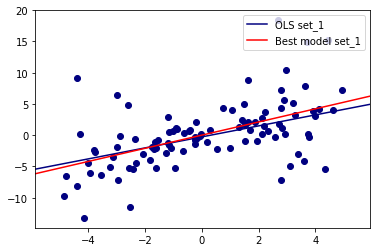

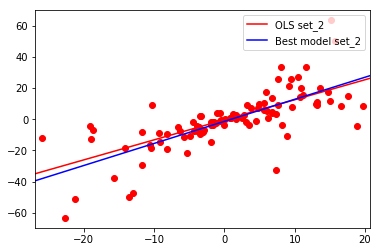

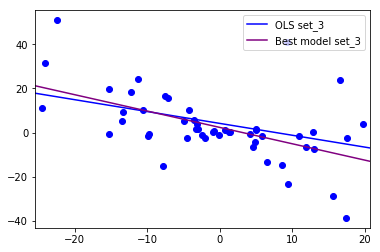

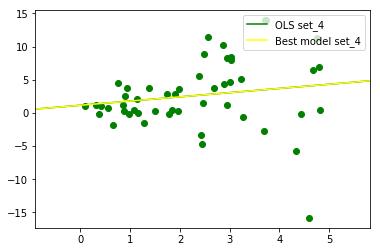

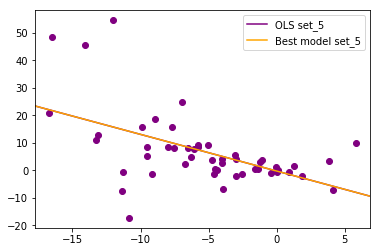

In [686]:
datas={}
Datas={}
alphaa=[0.0119,-1.3971,2.3556,1.1481,-0.2413]
DD=['red', 'blue', 'purple','yellow','orange']
betaa=[1.0538,1.4158,-0.7422,0.6334,-1.3331]
for i in range(0,5):
    datas[i]= np.linspace(MINN[i], MAXX[i], 20)
    Datas[i]= sm.add_constant(datas[i])
    fig, ax = plt.subplots()
    ax.scatter(data[i], resp[i],color=C[i]);
    ax.plot(datas[i], ols_result[i].predict(Datas[i]), color=C[i],label='OLS set_'+str(i+1));
    ax.set_xlim(MINN[i], MAXX[i]);
    
    #ax.legend(['OLS set_'+str(i+1)])
    ax.plot(datas[i], alphaa[i] + betaa[i] * datas[i],color=DD[i], label='Best model set_'+str(i+1));

    ax.legend(loc='upper right');
